In [77]:
import pandas as pd 
import geopandas as gpd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.patches as mpatches


/tmp/ipykernel_18141/617848019.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [102]:
data = gpd.read_file('полевые данные общая/profiles/profile_points.geojson')
data.AB = data.AB.astype('float')
data = data.dropna(axis = 0)

longitudinal = data[~data["name"].isin(["528", "444", "445", '446', '586'])].reset_index()
transverse = data[data["name"].isin(["528", "444", "445", '446', '586','527'])].reset_index()

# D:\python_projects\field_data\полевые данные общая\profiles\profile_points.geojson

<AxesSubplot:>

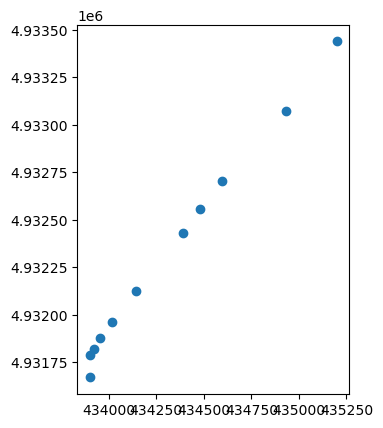

In [103]:
longitudinal.plot()

<AxesSubplot:>

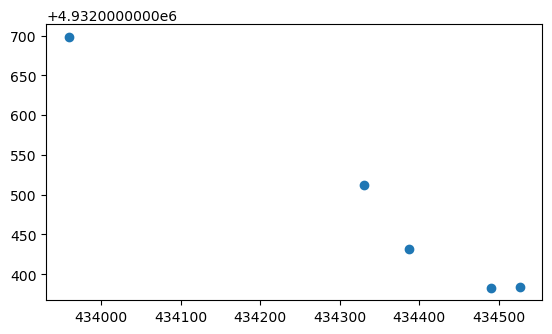

In [104]:
transverse.plot()

In [105]:
g = longitudinal[longitudinal.name == '585']

In [106]:
longitudinal['distance'] = longitudinal.geometry.distance(g.loc[g.index.repeat(18)].reset_index())

/home/geotrojan/.local/lib/python3.10/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [107]:
longitudinal = longitudinal.sort_values(by = 'distance', axis = 0)

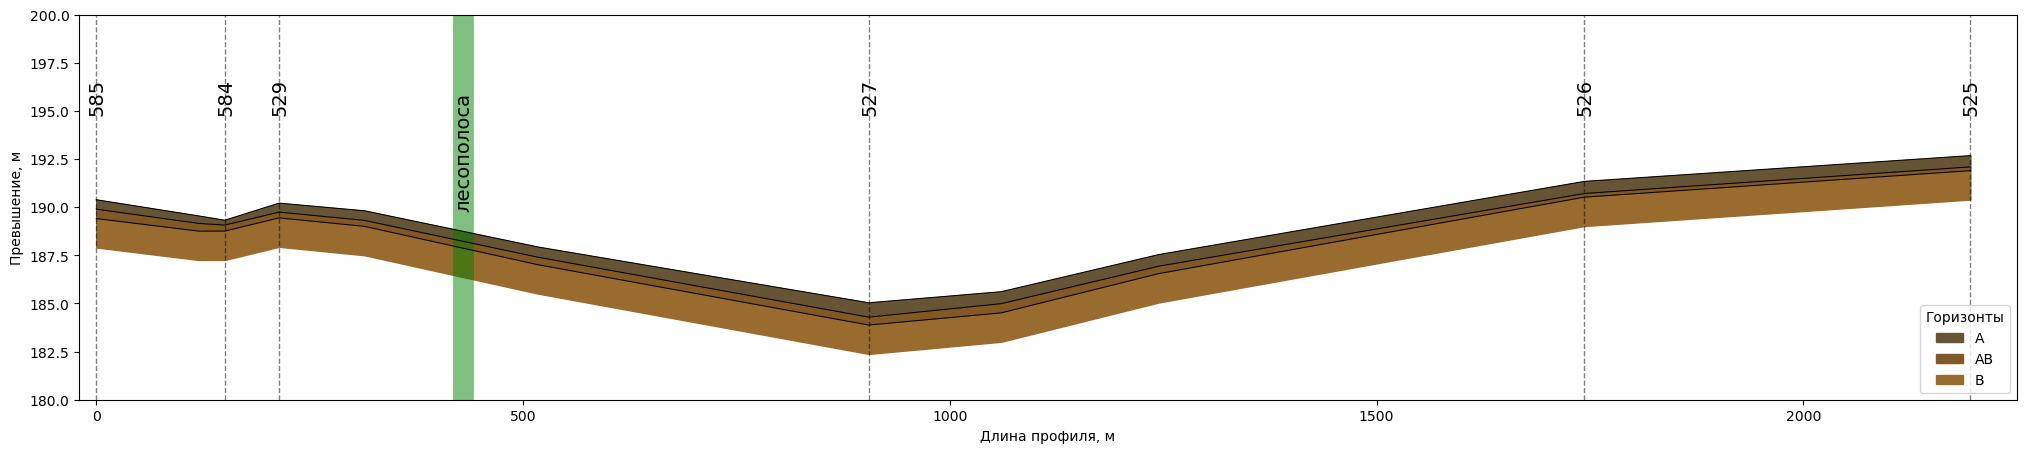

In [108]:
main = longitudinal[longitudinal['type'] == 'main'].reset_index()

fig, ax = plt.subplots(figsize = (25,5))


profile_list = [
    longitudinal["real_elev"],
    longitudinal["real_elev"] - (longitudinal.A * 0.01)  * 2,
    longitudinal["real_elev"] - (longitudinal.AB * 0.01)  * 2,
    (longitudinal["real_elev"] - (longitudinal.AB * 0.01) * 2 ) - 1.5]
color_list = ["#675434", "#825925","#996B2F" ]

sigma = 0.5
ax.axvline(430,color =  "green", alpha = 0.5,linewidth = 15 )
ax.text(x = 420 , y = 190, s = "лесополоса",size = 14 , rotation = 90)
ax.set( xlabel="Длина профиля, м", ylabel ='Превышение, м' , ylim=(180, 200), xlim=(-20,2250))






for hor in range(3):
    sns.lineplot( x =longitudinal['distance']  , y = gaussian_filter1d(profile_list[hor], sigma = sigma), ax = ax, color = 'black', size = 0.5)
    ax.fill_between(
        x =longitudinal['distance'],
        y1 = gaussian_filter1d(profile_list[hor], sigma = sigma),
        y2 =  gaussian_filter1d(profile_list[hor + 1 ], sigma = sigma), 
        color= color_list[hor]
    )
    
for i in range(6):
    ax.axvline(main["distance"][i],color =  "black", linewidth = 1, linestyle = "--", alpha = 0.5 )
    ax.text(main["distance"][i] - 10, y = 195, s = main["name"][i],size = 14 , rotation = 90)



labs = ["A","AB", "B"]
legend_list = []
for i in range(len(labs)):
    legend_list.append(mpatches.Patch(color=color_list[i], label= labs[i]))

plt.legend(handles=legend_list, title='Горизонты', loc='lower right',ncol = 1)



/home/geotrojan/.local/lib/python3.10/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


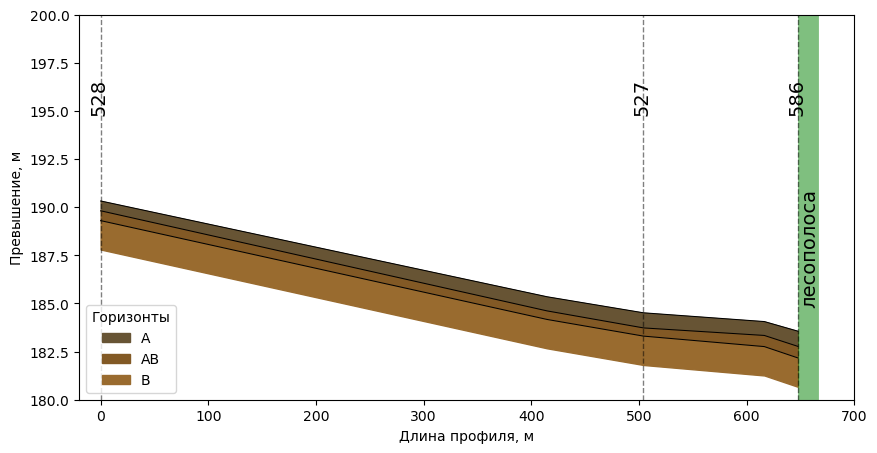

In [110]:
longitudinal = transverse



g = longitudinal[longitudinal.name == '528']

longitudinal['distance'] = longitudinal.geometry.distance(g.loc[g.index.repeat(18)].reset_index())

longitudinal = longitudinal.sort_values(by = 'distance', axis = 0)


main = longitudinal[longitudinal['type'] == 'main'].reset_index()

fig, ax = plt.subplots(figsize = (10,5))


profile_list = [
    longitudinal["real_elev"],
    longitudinal["real_elev"] - (longitudinal.A * 0.01)  * 2,
    longitudinal["real_elev"] - (longitudinal.AB * 0.01)  * 2,
    (longitudinal["real_elev"] - (longitudinal.AB * 0.01) * 2 ) - 1.5]
color_list = ["#675434", "#825925","#996B2F" ]

sigma = 0.5
ax.axvline(657,color =  "green", alpha = 0.5,linewidth = 15 )
ax.text(x = 650 , y = 185, s = "лесополоса",size = 14 , rotation = 90)
ax.set( xlabel="Длина профиля, м", ylabel ='Превышение, м' , ylim=(180, 200), xlim=(-20,700))






for hor in range(3):
    sns.lineplot( x =longitudinal['distance']  , y = gaussian_filter1d(profile_list[hor], sigma = sigma), ax = ax, color = 'black', size = 0.5)
    ax.fill_between(
        x =longitudinal['distance'],
        y1 = gaussian_filter1d(profile_list[hor], sigma = sigma),
        y2 =  gaussian_filter1d(profile_list[hor + 1 ], sigma = sigma), 
        color= color_list[hor]
    )
    
for i in range(3):
    ax.axvline(main["distance"][i],color =  "black", linewidth = 1, linestyle = "--", alpha = 0.5 )
    ax.text(main["distance"][i] - 10, y = 195, s = main["name"][i],size = 14 , rotation = 90)



labs = ["A","AB", "B"]
legend_list = []
for i in range(len(labs)):
    legend_list.append(mpatches.Patch(color=color_list[i], label= labs[i]))

plt.legend(handles=legend_list, title='Горизонты', loc='lower left',ncol = 1)
